In [27]:
# Traced curves of each component from Noordermeer's paper

In [28]:
import sys
sys.path.append('../../python/')

import dataPython as dp
import numpy as np
import scipy.interpolate as inter
import matplotlib.pyplot as plt

In [29]:
data_total = dp.getXYdata('../data/final/nord-120kpc-total.txt')
data_bh = dp.getXYdata('../data/final/nord-120kpc-blackhole.txt')
data_bulge = dp.getXYdata('../data/final/nord-120kpc-bulge.txt')
data_disk = dp.getXYdata('../data/final/nord-120kpc-disk.txt')
data_halo = dp.getXYdata('../data/final/nord-120kpc-halo.txt')
data_gas = dp.getXYdata('../data/final/nord-120kpc-gas.txt')
data_greyb_bottom = dp.getXYdata('../data/final/nord-120kpc-bottomband.txt')
data_greyb_top = dp.getXYdata('../data/final/nord-120kpc-topband.txt')

In [30]:
# Measured data points
#data = dp.getXYdata_wXYerr('../data/NGC5533-rot-data_fmt.txt')
data = dp.getXYdata_wXYerr('../data/100kpc_data.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

In [31]:
xmax = 120
rval = np.linspace(0.01,xmax,100)
#r = np.arange(0.1,xmax,0.1)

In [32]:
# Uncertainty band
# convert to numpy arrays
r_bottomband = np.asarray(data_greyb_bottom['xx'])
v_bottomband = np.asarray(data_greyb_bottom['yy'])
r_topband = np.asarray(data_greyb_top['xx'])
v_topband = np.asarray(data_greyb_top['yy'])

# smoothing - new, `spline` would not run on my computer
tb, cb, kb = inter.splrep(r_bottomband,v_bottomband)
tt, ct, kt = inter.splrep(r_topband,   v_topband)

greyb_bottom = inter.BSpline(tb, cb, kb)
greyb_top    = inter.BSpline(tt, ct, kt)

#greyb_bottom = inter.spline(r_bottomband,v_bottomband,rval,kind='smoothest')
#greyb_top = inter.spline(r_topband,v_topband,rval,kind='smoothest')

In [33]:
# Total curve
# convert to numpy arrays
r_total = np.asarray(data_total['xx'])
v_total = np.asarray(data_total['yy'])

# smoothing - new, `spline` would not run on my computer
t, c, k = inter.splrep(r_total,v_total)
f_v_total = inter.BSpline(t,c,k)

#f_v_total = inter.spline(r_total,v_total,rval,kind='smoothest')

In [34]:
# Black hole
# convert to numpy arrays
r_bh = np.asarray(data_bh['xx'])
v_bh = np.asarray(data_bh['yy'])

# smoothing - new, `spline` would not run on my computer
t, c, k = inter.splrep(r_bh,v_bh)
f_v_bh = inter.BSpline(t,c,k)

#f_v_bh = inter.spline(r_bh,v_bh,rval,kind='smoothest')

In [35]:
# Bulge
# convert to numpy arrays
r_bulge = np.asarray(data_bulge['xx'])
v_bulge = np.asarray(data_bulge['yy'])

# smoothing - new, `spline` would not run on my computer
t, c, k = inter.splrep(r_bulge,v_bulge)
f_v_bulge = inter.BSpline(t,c,k)

#f_v_bulge = inter.spline(r_bulge,v_bulge,rval,kind='smoothest')

In [36]:
# Disk
# convert to numpy arrays
r_disk = np.asarray(data_disk['xx'])
v_disk = np.asarray(data_disk['yy'])

# smoothing - new, `spline` would not run on my computer
t, c, k = inter.splrep(r_disk,v_disk)
f_v_disk = inter.BSpline(t,c,k)

#f_v_disk = inter.spline(r_disk,v_disk,rval,kind='smoothest')

In [38]:
# Halo
# convert to numpy arrays
r_halo = np.asarray(data_halo['xx'])
v_halo = np.asarray(data_halo['yy'])

# smoothing - new, `spline` would not run on my computer
t, c, k = inter.splrep(r_halo,v_halo)
f_v_halo = inter.BSpline(t,c,k)

#f_v_halo = inter.spline(r_halo,v_halo,rval,kind='smoothest')

In [40]:
# Gas
# convert to numpy arrays
r_gas = np.asarray(data_gas['xx'])
v_gas = np.asarray(data_gas['yy'])

# smoothing - new, `spline` would not run on my computer
t, c, k = inter.splrep(r_gas,v_gas)
f_v_gas = inter.BSpline(t,c,k)

#f_v_gas = inter.spline(r_gas,v_gas,rval,kind='smoothest')

In [41]:
# Added total - just to see how the components add up
f_addedtotal = lambda r: np.sqrt(f_v_halo(r)**2 + f_v_d(r)**2 + f_v_b(r)**2 + f_v_bh(r)**2 + f_v_g(r)**2)
f_addedtotal_v = np.vectorize(f_addedtotal)

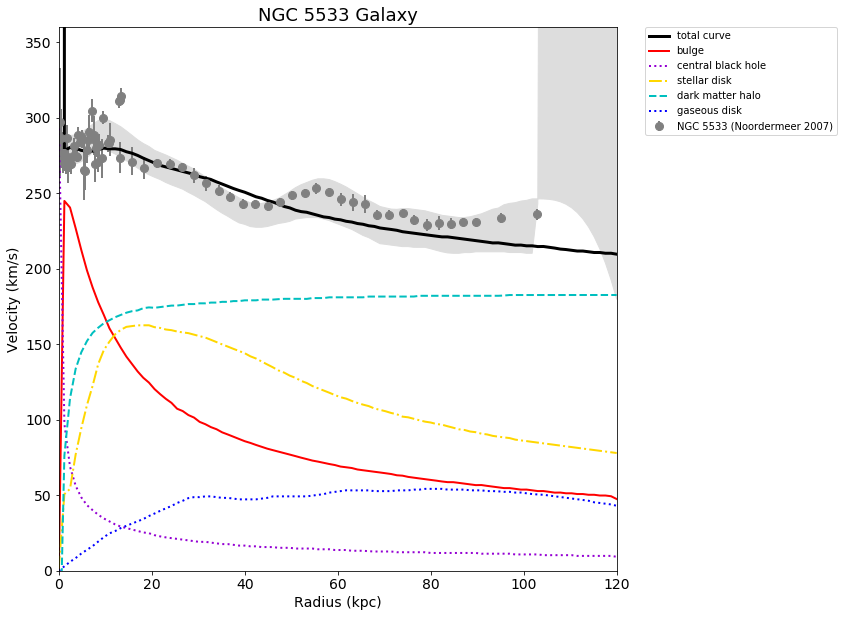

In [49]:
fig = plt.figure(figsize=(10.0,10.0))                
ax = plt.axes()

    
plt.errorbar(r_dat,v_dat,yerr=[v_err0,v_err1], marker='o', markersize=8,
             ecolor='gray',color='gray', linestyle='none', label='NGC 5533 (Noordermeer 2007)', linewidth=2)

plt.fill_between(rval,greyb_bottom(rval),greyb_top(rval),color='#dddddd')

plt.plot(rval, f_v_total(rval), color='k', linewidth=3, linestyle='solid', label='total curve') 
plt.plot(rval, f_v_bulge(rval), color='r', linewidth=2, linestyle='solid', label='bulge') 
plt.plot(rval, f_v_bh(rval), color='darkviolet', linewidth=2, linestyle=':', label='central black hole')
plt.plot(rval, f_v_disk(rval), color='gold', linewidth=2, linestyle='dashdot', label='stellar disk')
plt.plot(rval, f_v_halo(rval), color='c', linewidth=2, linestyle='--', label='dark matter halo')
plt.plot(rval, f_v_gas(rval), color='blue', linewidth=2, linestyle=':', label='gaseous disk') 
#plt.plot(rval, f_addedtotal_v(rval), color='k', linewidth=3, linestyle='solid', label='added total')

ax.set_ylim(0,360)
ax.set_xlim(0,xmax)
ax.set_title('NGC 5533 Galaxy', fontsize=18)             
ax.set_xlabel('Radius (kpc)', fontsize=14)
ax.set_ylabel('Velocity (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.tight_layout()
#plt.savefig('Noordermeer_plot.eps')
plt.show()